In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

# Heart Dataset

In [2]:
#Load the first dataset heart.csv
heart_df=pd.read_csv('heart.csv',sep=',')
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
heart_data=heart_df.copy()
# Rename columns in the heart DataFrame for better understanding
heart_data.rename(columns={
    'age': 'Age',
    'sex': 'Gender',
    'cp': 'Chest Pain Type',
    'trestbps': 'Resting Blood Pressure',
    'chol': 'Serum Cholesterol (mg/dl)',
    'fbs': 'Fasting Blood Sugar > 120 mg/dl',
    'restecg': 'Resting Electrocardiographic Results',
    'thalach': 'Maximum Heart Rate Achieved',
    'exang': 'Exercise Induced Angina',
    'oldpeak': 'ST Depression Induced by Exercise Relative to Rest',
    'slope': 'Slope of the Peak Exercise ST Segment',
    'ca': 'Number of Major Vessels Colored by Flourosopy',
    'thal': 'Thal'
}, inplace=True)

# Display the renamed columns
print(heart_data.columns)

Index(['Age', 'Gender', 'Chest Pain Type', 'Resting Blood Pressure',
       'Serum Cholesterol (mg/dl)', 'Fasting Blood Sugar > 120 mg/dl',
       'Resting Electrocardiographic Results', 'Maximum Heart Rate Achieved',
       'Exercise Induced Angina',
       'ST Depression Induced by Exercise Relative to Rest',
       'Slope of the Peak Exercise ST Segment',
       'Number of Major Vessels Colored by Flourosopy', 'Thal', 'target'],
      dtype='object')


# Sleep, Health and Lifestyle Dataset

In [4]:
#Load second Dataset
Sleep_health_and_lifestyle_df=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv',sep=',')
Sleep_health_and_lifestyle_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Cleaning Datasets

In [5]:
# Data Cleaning Functions
def clean_sleep_data(data):
    # Handle missing values, outliers, etc. in sleep data
    # There is no cleaning required for this dataset
    return data

In [6]:
def clean_cardio_data(data):
    # Handle missing values, outliers, etc. in heart disease data
    # There is no cleaning required for this dataset
    return data

In [7]:
# Clean data using defined functions
sleep_data = clean_sleep_data(Sleep_health_and_lifestyle_df.copy())
cardio_data = clean_cardio_data(heart_data.copy())

# Preprocessing the Datasets

In [8]:
# Preprocess Sleep Data Categorical Variables
# One-hot encode categorical features (Gender, Occupation, BMI Category, Sleep Disorder)
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_cols = pd.get_dummies(sleep_data[["Gender", "Occupation", "BMI Category", "Sleep Disorder"]])
sleep_data = pd.concat([sleep_data, encoded_cols], axis=1)
sleep_data.drop(["Gender", "Occupation", "BMI Category", "Sleep Disorder"], axis=1, inplace=True)

In [9]:
# Separate Systolic and Diastolic Blood Pressure (if combined in sleep data)
if "Blood Pressure" in sleep_data.columns:
    bp_split = sleep_data["Blood Pressure"].str.split("/")
    sleep_data["Systolic Blood Pressure"] = bp_split.str[0].astype(int)
    sleep_data["Diastolic Blood Pressure"] = bp_split.str[1].astype(int)
    sleep_data.drop("Blood Pressure", axis=1, inplace=True)

# Visualizing Heart Dataset

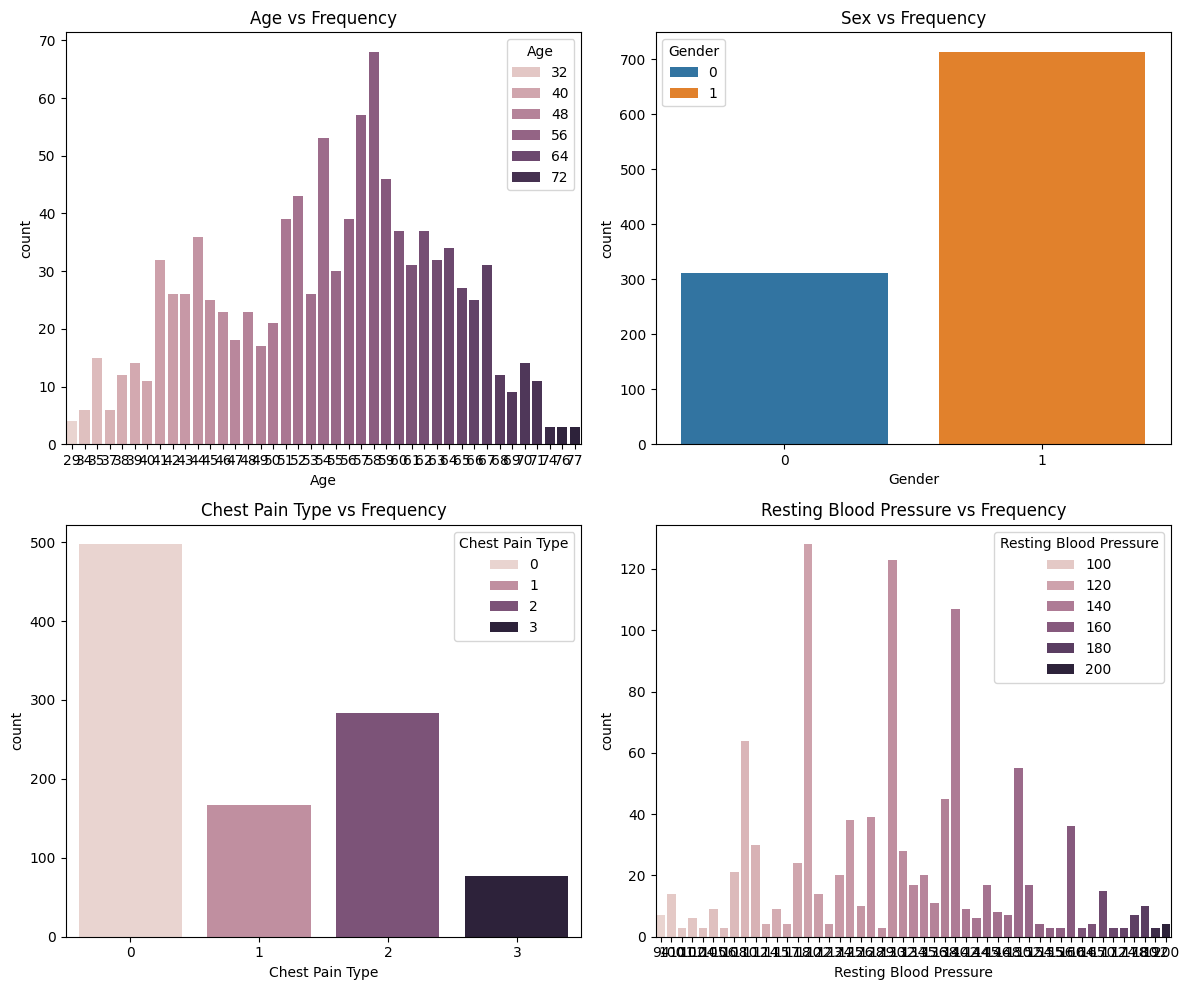

In [10]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot age vs frequency
sns.countplot(data=heart_data, x='Age', hue='Age', ax=axes[0, 0])
axes[0, 0].set_title('Age vs Frequency')

# Plot sex vs frequency
sns.countplot(data=heart_data, x='Gender', hue='Gender', ax=axes[0, 1])
axes[0, 1].set_title('Sex vs Frequency')

# Plot chest pain type (cp) vs frequency
sns.countplot(data=heart_data, x='Chest Pain Type', hue='Chest Pain Type', ax=axes[1, 0])
axes[1, 0].set_title('Chest Pain Type vs Frequency')

# Plot resting blood pressure (trestbps) vs frequency
sns.countplot(data=heart_data, x='Resting Blood Pressure', hue='Resting Blood Pressure', ax=axes[1, 1])
axes[1, 1].set_title('Resting Blood Pressure vs Frequency')

# Adjust layout
plt.tight_layout()

# Save the plot as a JPG image
plt.savefig('subplot_plots.jpg', format='jpg')

# Show the plot
plt.show()

Age vs Frequency

*   Summary: This histogram shows the distribution of a variable—presumably 'Age'—across a dataset. The distribution appears to be roughly bell-shaped, indicating a normal distribution of ages with a peak frequency in the mid-50s age range.
*   Observation: The highest concentration of data points is between the ages of 50 and 60, suggesting this is the most common age range within the population studied. There are fewer counts for ages below 30 and above 70, indicating these age groups are less represented in the data.


Sex vs Frequency

*   Summary: This bar chart compares two categories of a 'Sex' variable, likely coded as 0 and 1. There's a significant difference in count between the two, with the '1' category having a much higher frequency than '0'.
*   Observation: The '1' category outnumbers '0' by a large margin, suggesting an uneven distribution between the two groups in the population. This could reflect a gender disparity within the dataset or the population from which the data was drawn.


Chest Pain Type vs Frequency

*   Summary: This bar chart shows the frequency of different types of chest pain, categorized from 0 to 3. Type '0' has the highest frequency, followed by a considerable drop in counts for type '1', and even lower frequencies for types '2' and '3'.
*   Observation: Type '0' chest pain is the most common in this dataset, possibly indicating it is the most prevalent or most likely to be reported. The sharp decrease from type '0' to '1' and subsequent types could suggest a significant difference in the prevalence or reporting of different pain types.


Resting Blood Pressure vs Frequency

*   Summary: This histogram depicts the frequency of various resting blood pressure readings. The distribution has multiple peaks, indicating several common blood pressure ranges.
*   Observation: The data points cluster around certain values, such as 120, 130, and 140 mmHg, which are common thresholds for blood pressure categories. The spread of the data suggests a range of blood pressure variations within the studied population, with notable peaks at clinically significant values.











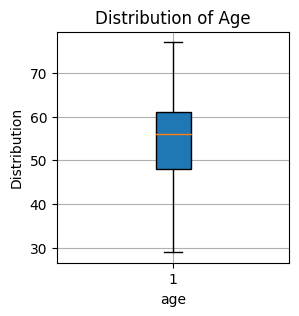

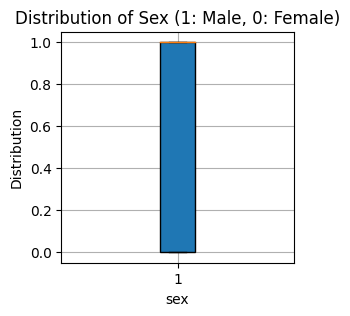

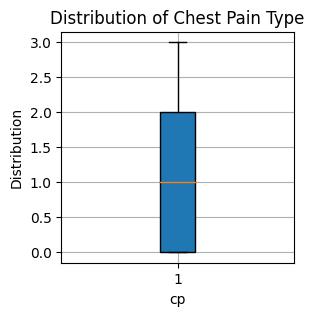

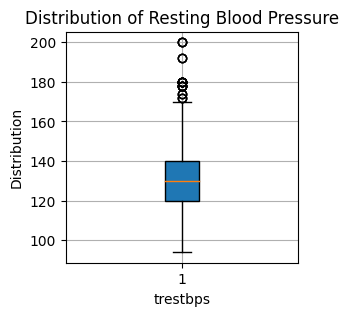

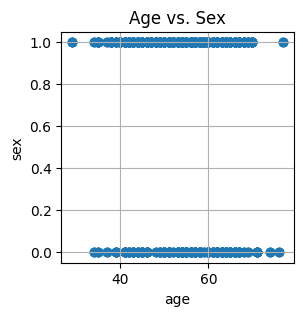

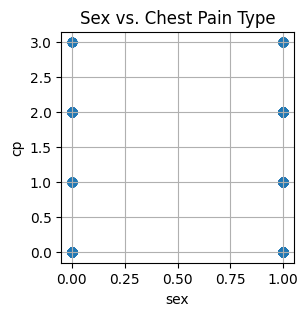

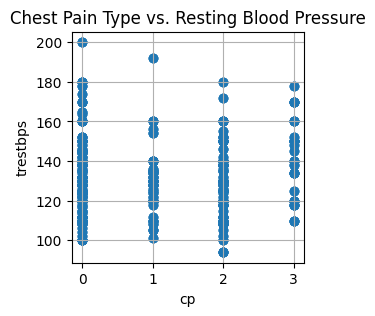

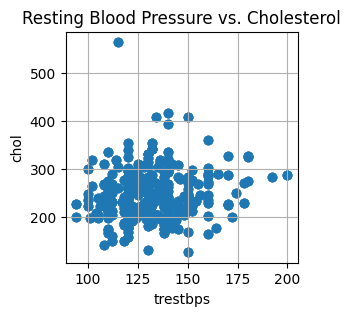

In [11]:
# Function to create boxplots
def create_boxplot(data, variable, title):
    plt.figure(figsize=(3, 3))
    plt.boxplot(data[variable], vert=True, patch_artist=True)
    plt.xlabel(variable)
    plt.ylabel("Distribution")
    plt.title(title)
    plt.grid(True)
    plt.show()

# Function to create scatter plots (customizable for other plots)
def create_scatterplot(data, x_variable, y_variable, title):
    plt.figure(figsize=(3, 3))
    plt.scatter(data[x_variable], data[y_variable])
    plt.xlabel(x_variable)
    plt.ylabel(y_variable)
    plt.title(title)
    plt.grid(True)
    plt.show()


# Individual boxplots
create_boxplot(heart_df, "age", "Distribution of Age")
create_boxplot(heart_df, "sex", "Distribution of Sex (1: Male, 0: Female)")
create_boxplot(heart_df, "cp", "Distribution of Chest Pain Type")
create_boxplot(heart_df, "trestbps", "Distribution of Resting Blood Pressure")

# Relationship plots (scatter plots)
create_scatterplot(heart_df, "age", "sex", "Age vs. Sex")
create_scatterplot(heart_df, "sex", "cp", "Sex vs. Chest Pain Type")
create_scatterplot(heart_df, "cp", "trestbps", "Chest Pain Type vs. Resting Blood Pressure")
create_scatterplot(heart_df, "trestbps", "chol", "Resting Blood Pressure vs. Cholesterol")

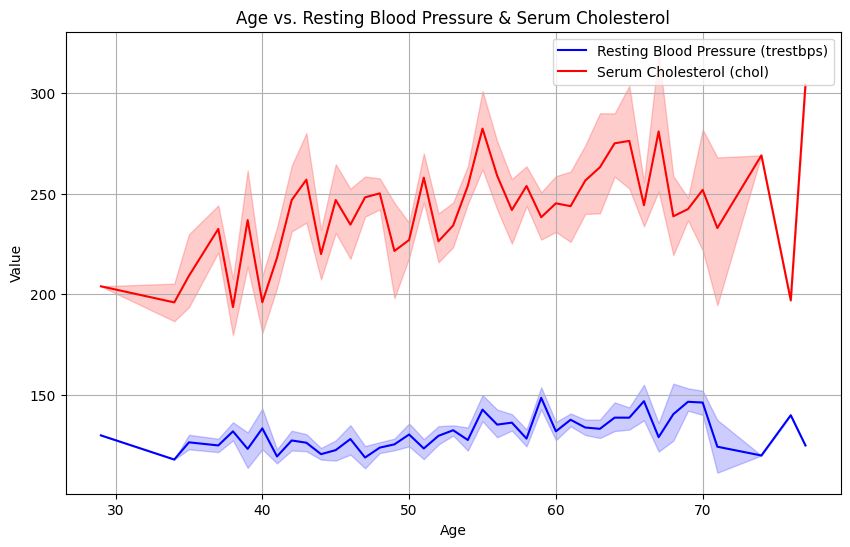

In [12]:
# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plot age vs. trestbps
sns.lineplot(data=heart_df, x='age', y='trestbps', label='Resting Blood Pressure (trestbps)', color='blue')

# Plot age vs. chol
sns.lineplot(data=heart_df, x='age', y='chol', label='Serum Cholesterol (chol)', color='red')

# Customize the plot
plt.title('Age vs. Resting Blood Pressure & Serum Cholesterol')
plt.xlabel('Age')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Age vs. Resting Blood Pressure & Serum Cholesterol

*   Summary: This line chart with shaded areas depicts two variables, resting blood pressure and serum cholesterol levels, against age.
*   Observation: Both resting blood pressure and cholesterol levels show fluctuations with age. There is a notable increase in cholesterol variability starting in the late 40s. Resting blood pressure shows a downward trend after age 60, but this data could be affected by a smaller sample size in the higher age range, as indicated by the widening confidence interval.





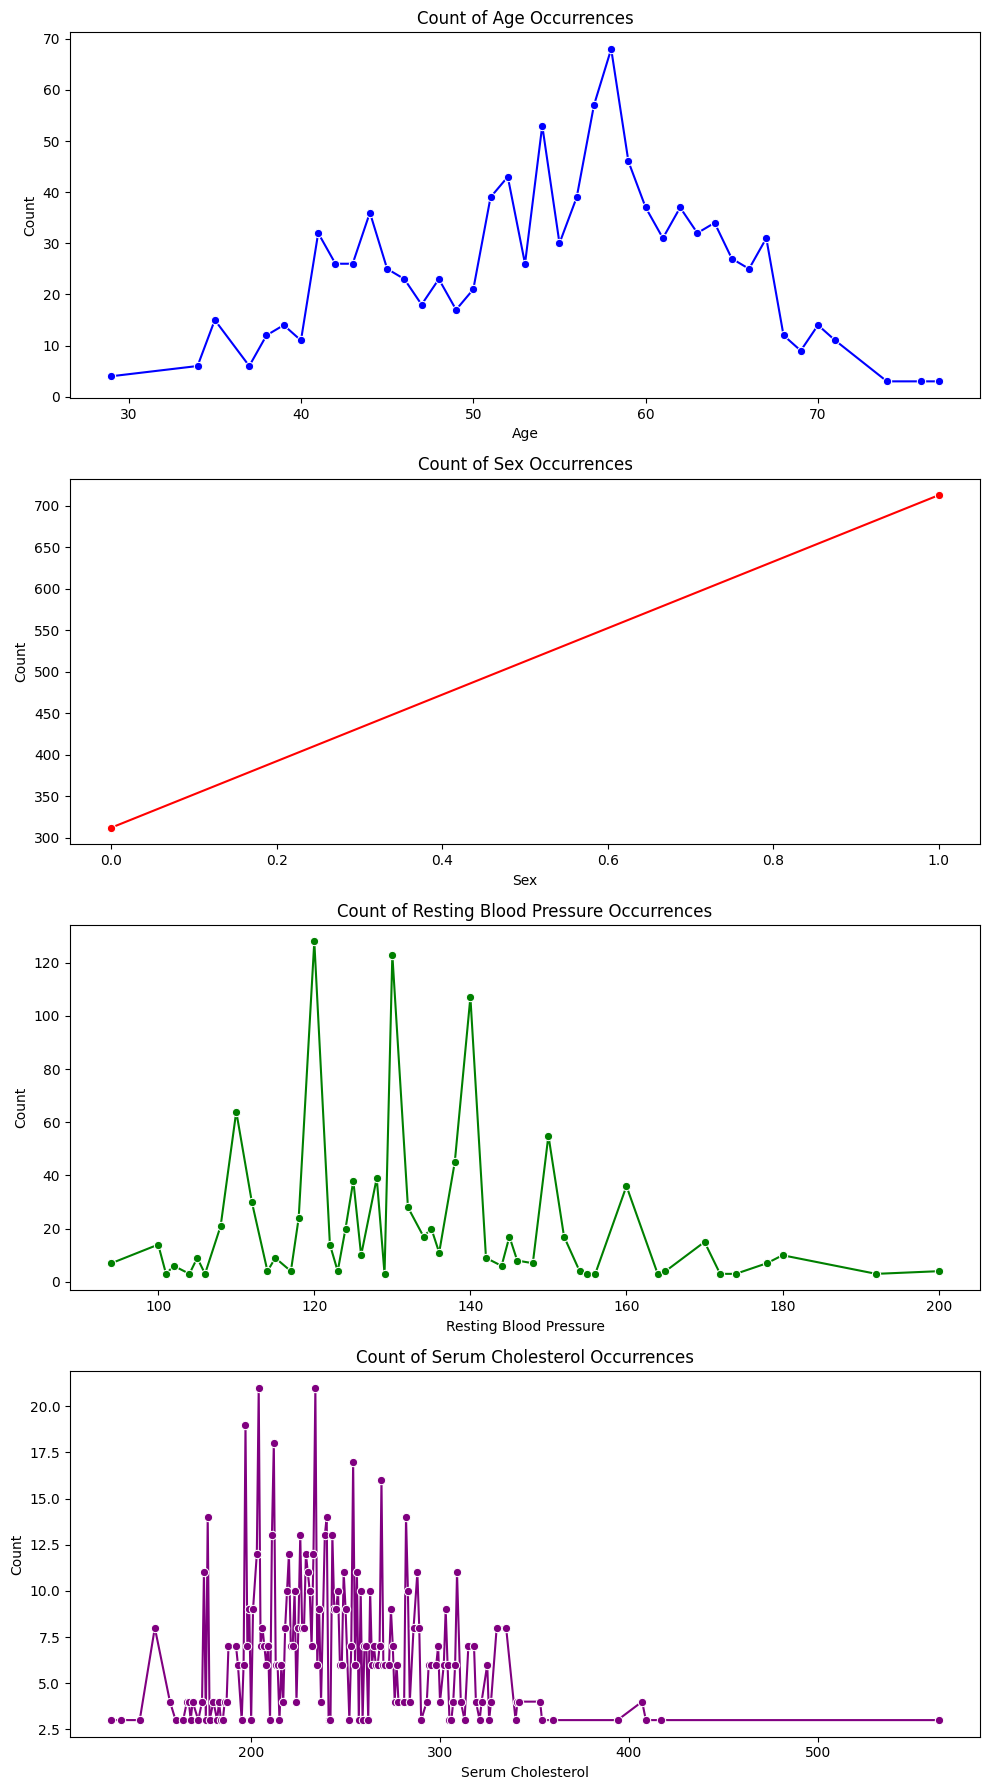

In [13]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 18))

# Plot count of age occurrences
sns.lineplot(data=heart_df['age'].value_counts().sort_index(), ax=axes[0], marker='o', color='blue')
axes[0].set_title('Count of Age Occurrences')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Plot count of sex occurrences
sns.lineplot(data=heart_df['sex'].value_counts().sort_index(), ax=axes[1], marker='o', color='red')
axes[1].set_title('Count of Sex Occurrences')
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Count')

# Plot count of trestbps occurrences
sns.lineplot(data=heart_df['trestbps'].value_counts().sort_index(), ax=axes[2], marker='o', color='green')
axes[2].set_title('Count of Resting Blood Pressure Occurrences')
axes[2].set_xlabel('Resting Blood Pressure')
axes[2].set_ylabel('Count')

# Plot count of chol occurrences
sns.lineplot(data=heart_df['chol'].value_counts().sort_index(), ax=axes[3], marker='o', color='purple')
axes[3].set_title('Count of Serum Cholesterol Occurrences')
axes[3].set_xlabel('Serum Cholesterol')
axes[3].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Count of Age Occurrences

*   Summary: This line graph represents the frequency of occurrence for different ages within the dataset.
*   Observation: The graph displays a multimodal distribution with peaks at around ages 55 and 60. There is a noticeable decrease in frequency after age 60, indicating fewer occurrences of older ages within the dataset.


Count of Sex Occurrences

*   Summary: This line graph shows the count of occurrences plotted against two categories of sex, presumably '0' for female and '1' for male.
*   Observation: The line graph, which appears as a straight, ascending line, suggests an increasing count of occurrences from '0' to '1'. Given the nature of binary categorical data, this representation is unusual but it does seem to imply a higher count of category '1' compared to '0'.


Count of Resting Blood Pressure and Serum Cholesterol Occurrences

*   Summary: This image consists of two line graphs. The top graph represents the frequency of various resting blood pressure readings, and the bottom graph shows the frequency of different serum cholesterol levels in the dataset.
*   Observations:

1.   Resting Blood Pressure:
The frequency of resting blood pressure readings shows several peaks, particularly around 120, 130, and 140 mmHg, which are common targets for healthy blood pressure levels.
There are fewer occurrences of readings below 100 and above 180, which are generally considered outside the normal range.
2.   Serum Cholesterol:
Cholesterol levels show a wide range of values with multiple peaks, indicating variability in the dataset.
There's a high frequency of cholesterol levels around 200-300 mg/dL, which aligns with common clinical benchmarks.
The graph also shows that extremely high cholesterol levels (above 300 mg/dL) are less common.










# Visualizing Sleep and Health Dataset

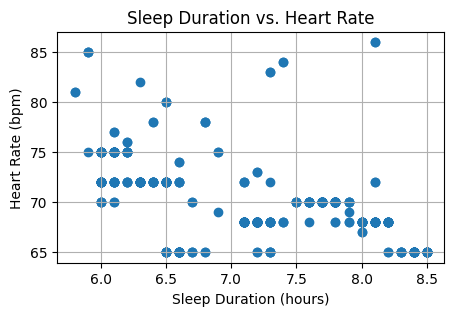

In [14]:
# Visualizations (scatter plots)
plt.figure(figsize=(5, 3))
plt.scatter(sleep_data["Sleep Duration"], sleep_data["Heart Rate"])
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Heart Rate (bpm)")
plt.title("Sleep Duration vs. Heart Rate")
plt.grid(True)
plt.show()

Sleep Duration vs. Heart Rate

*   Summary: Scatter plot showing the relationship between sleep duration and heart rate.
*   Observation: There does not appear to be a strong correlation between sleep duration and heart rate across this dataset. Heart rate values are scattered across the sleep duration range, suggesting that within this population, the length of sleep doesn't consistently affect heart rate.






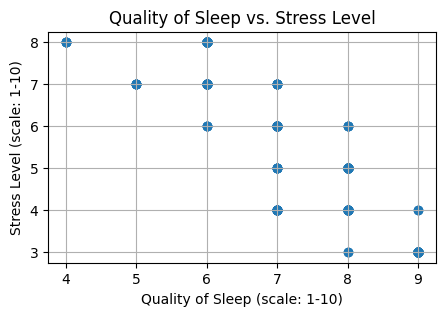

In [15]:
plt.figure(figsize=(5, 3))
plt.scatter(sleep_data["Quality of Sleep"], sleep_data["Stress Level"])
plt.xlabel("Quality of Sleep (scale: 1-10)")
plt.ylabel("Stress Level (scale: 1-10)")
plt.title("Quality of Sleep vs. Stress Level")
plt.grid(True)
plt.show()

Quality of Sleep vs. Stress Level

*   Summary: Scatter plot depicting the relationship between self-reported sleep quality and stress levels.
*   Observation: The plot does not show a clear trend between the quality of sleep and stress levels, indicating that the perceived quality of sleep may not be directly related to stress levels, or other unmeasured factors may influence this relationship.





# Exploratory Data Analysis (Cardiovascular Data)

In [16]:
# Focus on Risk Factors in heart disease data
cardio_risk_factors = ["age", "trestbps", "chol", "fbs", "thalach", "ca"]
heart_corr = heart_df[cardio_risk_factors].corr()
print("\nCardiovascular Risk Factors Correlations:")
print(heart_corr)


Cardiovascular Risk Factors Correlations:
               age  trestbps      chol       fbs   thalach        ca
age       1.000000  0.271121  0.219823  0.121243 -0.390227  0.271551
trestbps  0.271121  1.000000  0.127977  0.181767 -0.039264  0.104554
chol      0.219823  0.127977  1.000000  0.026917 -0.021772  0.074259
fbs       0.121243  0.181767  0.026917  1.000000 -0.008866  0.137156
thalach  -0.390227 -0.039264 -0.021772 -0.008866  1.000000 -0.207888
ca        0.271551  0.104554  0.074259  0.137156 -0.207888  1.000000


Correlation Matrix

*   Summary: The matrix presents the correlation coefficients between various cardiovascular risk factors.
*   Observation: Notable correlations include the positive relationship between 'age' and 'trestbps' (resting blood pressure), and a negative correlation between 'age' and 'thalach' (maximum heart rate achieved). 'Chol' (cholesterol levels) does not have a strong correlation with 'age'.






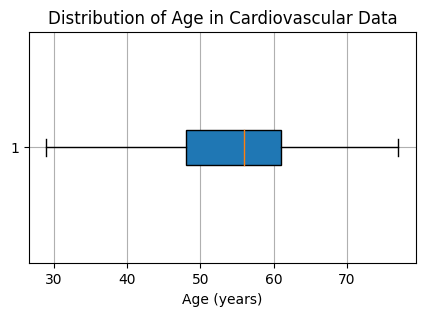

In [17]:
# Visualizations (boxplots)
plt.figure(figsize=(5, 3))
plt.boxplot(heart_df["age"], vert=False, patch_artist=True)
plt.xlabel("Age (years)")  # Add a descriptive label for the x-axis
plt.title("Distribution of Age in Cardiovascular Data")
plt.grid(True)
plt.show()

Distribution of Age in Cardiovascular Data

*   Summary: The boxplot visualizes the age distribution within the cardiovascular dataset.
*   Observation: The median age appears to be in the late 50s, and the data points are mostly concentrated between the early 40s and late 60s. There are outliers suggesting the presence of individuals older and younger than the main age group.





# Merging the Datasets

In [18]:
# Merge datasets on 'age' and 'Age' columns
merged_data = pd.merge(heart_data, Sleep_health_and_lifestyle_df, on='Age')

# Display merged dataset
print(merged_data.head())

   Age  Gender_x  Chest Pain Type  Resting Blood Pressure  \
0   52         1                0                     125   
1   52         1                0                     125   
2   52         1                0                     125   
3   52         1                0                     125   
4   52         1                0                     125   

   Serum Cholesterol (mg/dl)  Fasting Blood Sugar > 120 mg/dl  \
0                        212                                0   
1                        212                                0   
2                        212                                0   
3                        212                                0   
4                        212                                0   

   Resting Electrocardiographic Results  Maximum Heart Rate Achieved  \
0                                     1                          168   
1                                     1                          168   
2                         

In [19]:
print(merged_data.columns)

Index(['Age', 'Gender_x', 'Chest Pain Type', 'Resting Blood Pressure',
       'Serum Cholesterol (mg/dl)', 'Fasting Blood Sugar > 120 mg/dl',
       'Resting Electrocardiographic Results', 'Maximum Heart Rate Achieved',
       'Exercise Induced Angina',
       'ST Depression Induced by Exercise Relative to Rest',
       'Slope of the Peak Exercise ST Segment',
       'Number of Major Vessels Colored by Flourosopy', 'Thal', 'target',
       'Person ID', 'Gender_y', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')


<ipython-input-20-ade2fa6b925f>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_data, x='Chest Pain Type', ax=axes[2, 0], palette=colors)
<ipython-input-20-ade2fa6b925f>:44: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.countplot(data=merged_data, x='Chest Pain Type', ax=axes[2, 0], palette=colors)
<ipython-input-20-ade2fa6b925f>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_data, x='Age', ax=axes[2, 1], palette=colors)
<ipython-input-20-ade2fa6b925f>:50: UserWarning: 
The palette list has fewer values (6) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=m

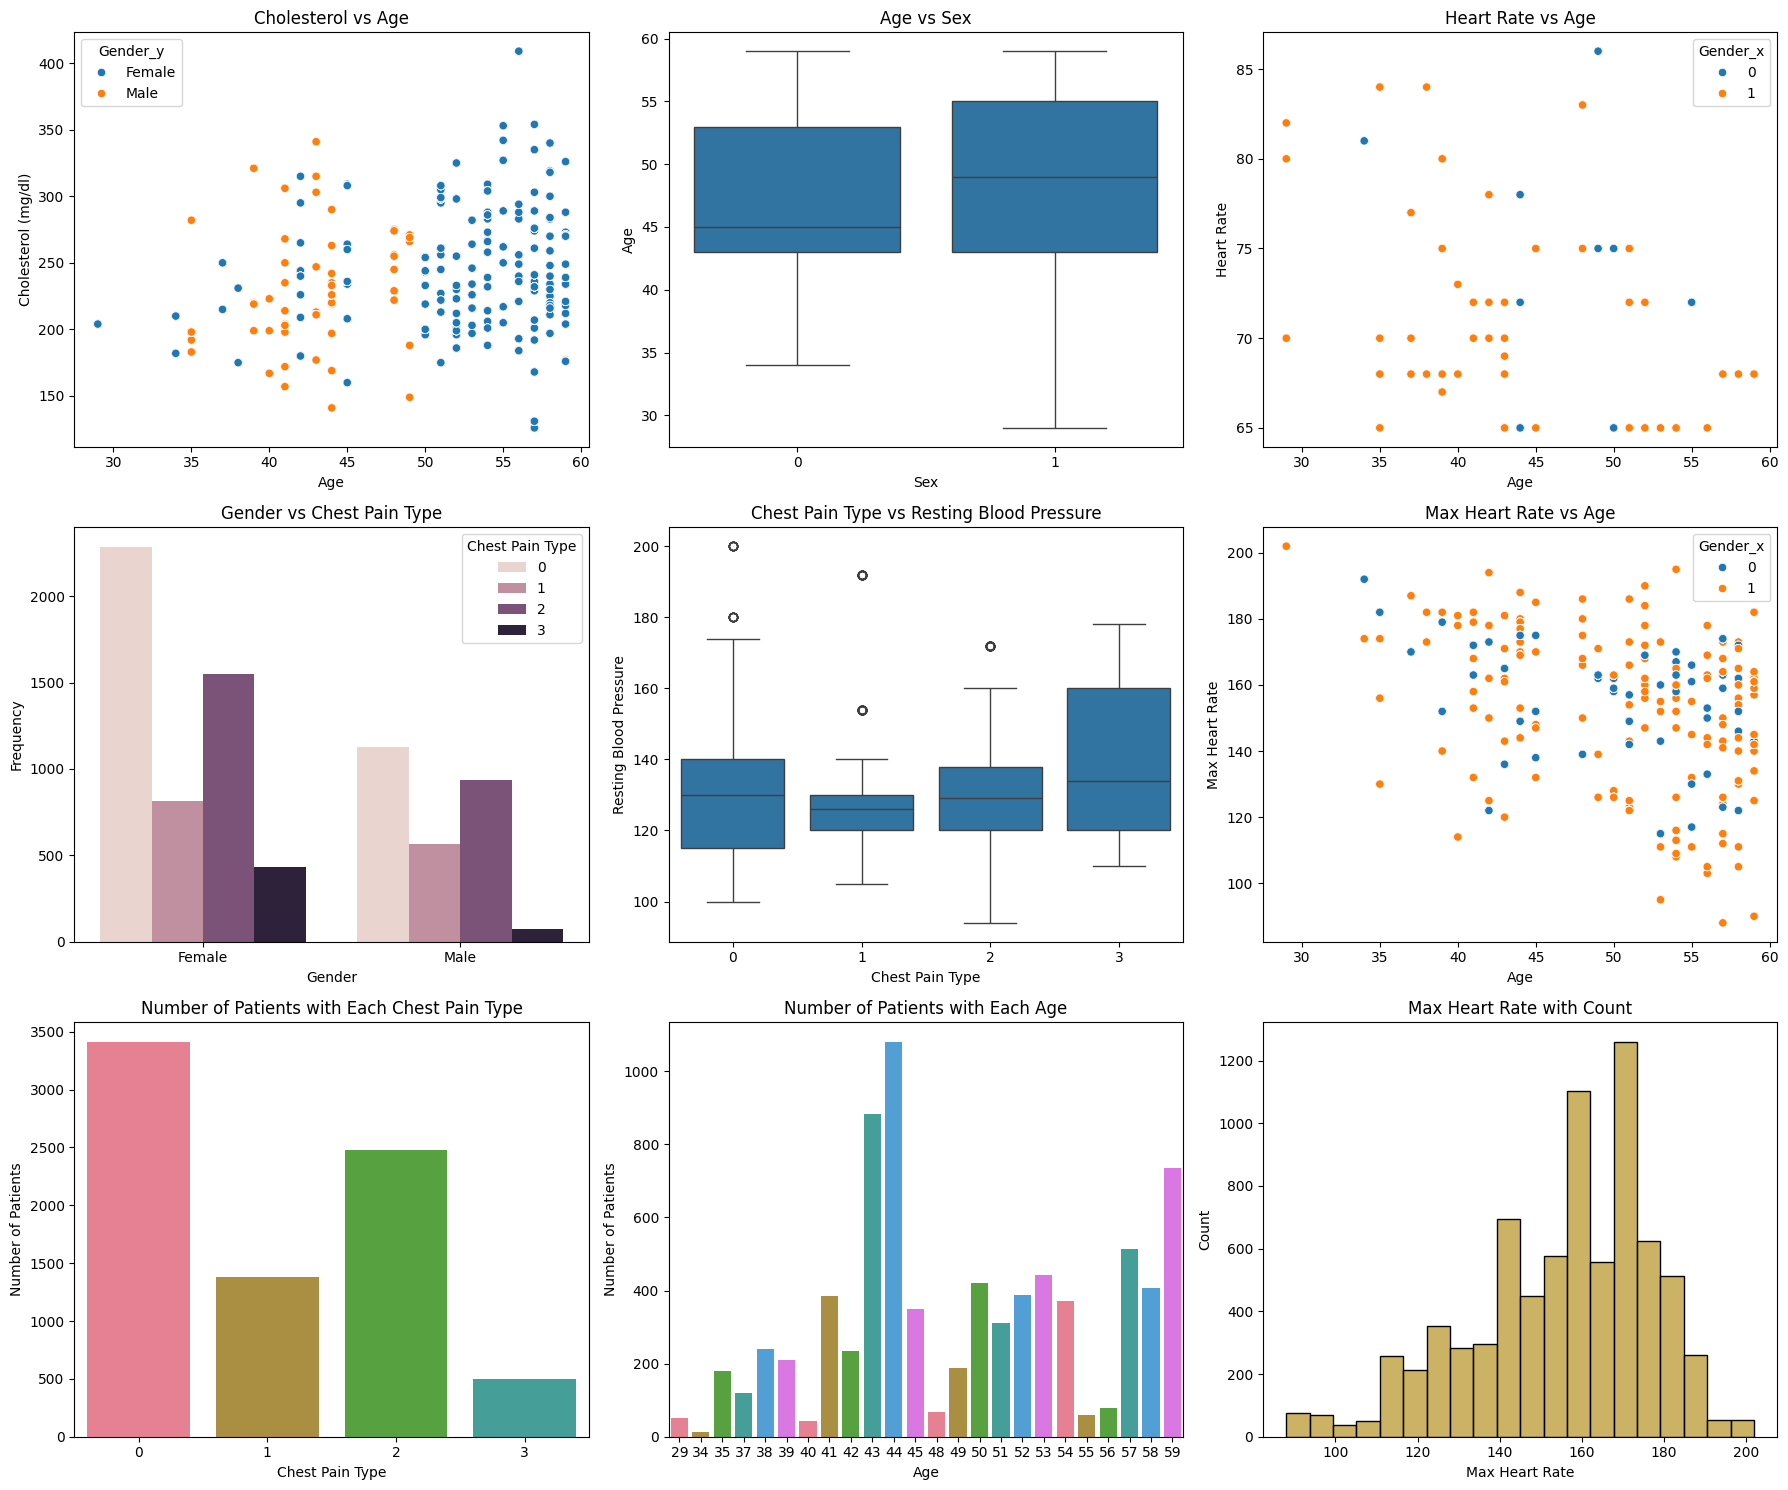

In [20]:
# Set a color palette
colors = sns.color_palette("husl")

# Set up the figure and axes for subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# Plot cholesterol vs age
sns.scatterplot(data=merged_data, x='Age', y='Serum Cholesterol (mg/dl)', hue='Gender_y', ax=axes[0, 0])
axes[0, 0].set_title('Cholesterol vs Age')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Cholesterol (mg/dl)')

# Plot age vs sex
sns.boxplot(data=merged_data, x='Gender_x', y='Age', ax=axes[0, 1])
axes[0, 1].set_title('Age vs Sex')
axes[0, 1].set_xlabel('Sex')
axes[0, 1].set_ylabel('Age')

# Plot heart rate vs age
sns.scatterplot(data=merged_data, x='Age', y='Heart Rate', hue='Gender_x', ax=axes[0, 2])
axes[0, 2].set_title('Heart Rate vs Age')
axes[0, 2].set_xlabel('Age')
axes[0, 2].set_ylabel('Heart Rate')

# Plot sex vs chest pain type (cp)
sns.countplot(data=merged_data, x='Gender_y', hue='Chest Pain Type', ax=axes[1, 0])
axes[1, 0].set_title('Gender vs Chest Pain Type')
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Frequency')

# Plot chest pain type vs resting blood pressure (trestbps)
sns.boxplot(data=merged_data, x='Chest Pain Type', y='Resting Blood Pressure', ax=axes[1, 1])
axes[1, 1].set_title('Chest Pain Type vs Resting Blood Pressure')
axes[1, 1].set_xlabel('Chest Pain Type')
axes[1, 1].set_ylabel('Resting Blood Pressure')

# Plot max heart rate vs age
sns.scatterplot(data=merged_data, x='Age', y='Maximum Heart Rate Achieved', hue='Gender_x', ax=axes[1, 2], color=colors[0])
axes[1, 2].set_title('Max Heart Rate vs Age')
axes[1, 2].set_xlabel('Age')
axes[1, 2].set_ylabel('Max Heart Rate')

# Plot number of patients with each chest pain type
sns.countplot(data=merged_data, x='Chest Pain Type', ax=axes[2, 0], palette=colors)
axes[2, 0].set_title('Number of Patients with Each Chest Pain Type')
axes[2, 0].set_xlabel('Chest Pain Type')
axes[2, 0].set_ylabel('Number of Patients')

# Plot number of patients with each age
sns.countplot(data=merged_data, x='Age', ax=axes[2, 1], palette=colors)
axes[2, 1].set_title('Number of Patients with Each Age')
axes[2, 1].set_xlabel('Age')
axes[2, 1].set_ylabel('Number of Patients')

# Plot max heart rate with count
sns.histplot(data=merged_data, x='Maximum Heart Rate Achieved', bins=20, ax=axes[2, 2], color=colors[1])
axes[2, 2].set_title('Max Heart Rate with Count')
axes[2, 2].set_xlabel('Max Heart Rate')
axes[2, 2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [21]:
# Correlations between sleep variables and potential risk factors
sleep_corr = sleep_data[["Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", "Systolic Blood Pressure", "Diastolic Blood Pressure"]].corr()
print("Sleep Data Correlations:")
print(sleep_corr)

Sleep Data Correlations:
                          Sleep Duration  Quality of Sleep  \
Sleep Duration                  1.000000          0.883213   
Quality of Sleep                0.883213          1.000000   
Physical Activity Level         0.212360          0.192896   
Stress Level                   -0.811023         -0.898752   
Heart Rate                     -0.516455         -0.659865   
Systolic Blood Pressure        -0.180406         -0.121632   
Diastolic Blood Pressure       -0.166570         -0.110151   

                          Physical Activity Level  Stress Level  Heart Rate  \
Sleep Duration                           0.212360     -0.811023   -0.516455   
Quality of Sleep                         0.192896     -0.898752   -0.659865   
Physical Activity Level                  1.000000     -0.034134    0.136971   
Stress Level                            -0.034134      1.000000    0.670026   
Heart Rate                               0.136971      0.670026    1.000000   
Syst

Correlations Between Sleep Variables and Potential Risk Factors


*   Summary: The snippet of code provides a correlation matrix for various sleep-related variables and potential cardiovascular risk factors.
*   Observation: Notable correlations include a positive association between the quality of sleep and physical activity level, and a negative association between quality of sleep and stress level, which may suggest an interaction between lifestyle factors and sleep quality.





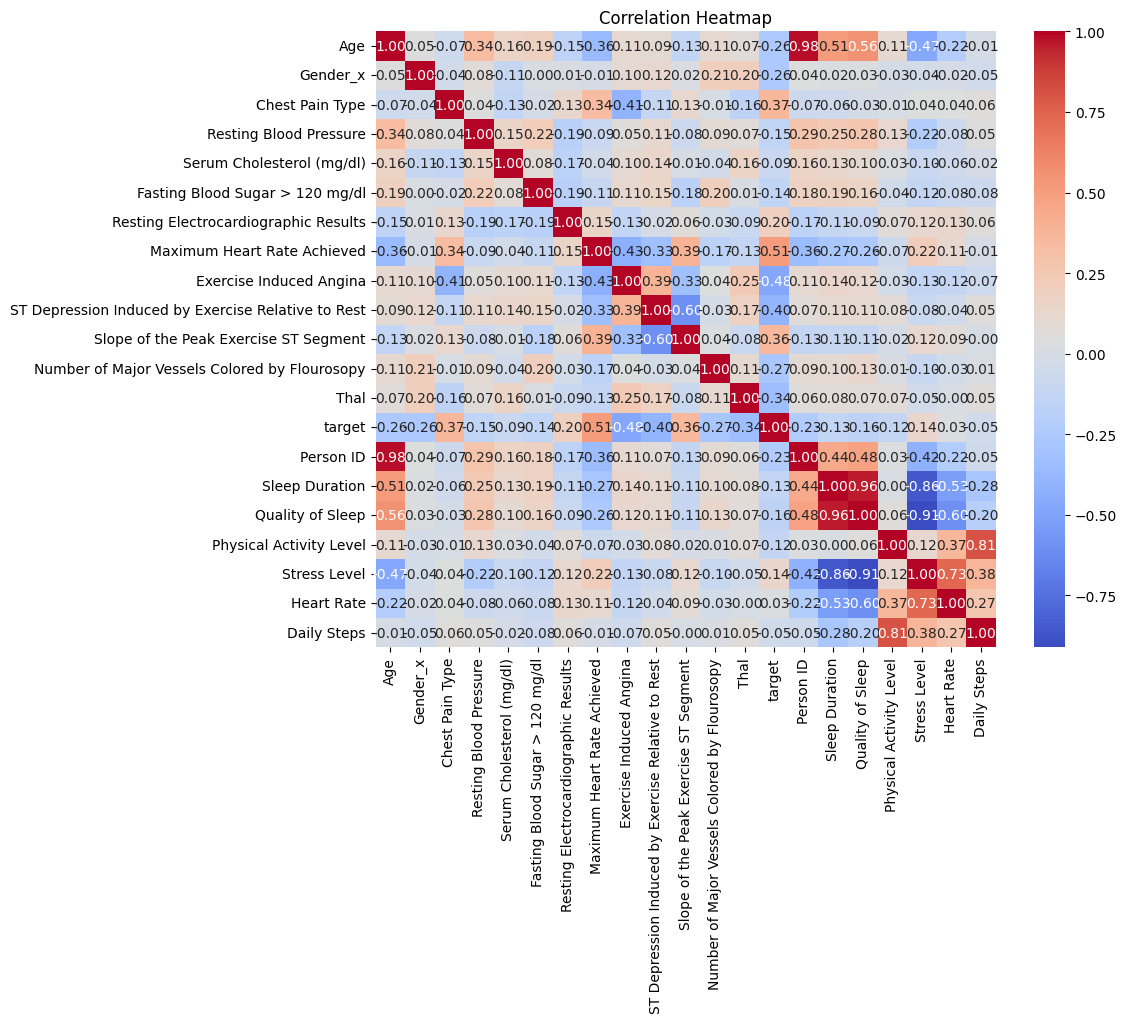

In [22]:
# Select only numeric columns for correlation calculation
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64'])

# Calculate correlations between numeric variables
correlation_matrix = numeric_columns.corr()

# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [23]:
# Example hypothesis testing using t-test
from scipy.stats import ttest_ind

# Hypothesis: There is a significant difference in heart rate between individuals with and without sleep disorders
heart_rate_sleep_disorder = merged_data[merged_data["Sleep Disorder"] != "None"]["Heart Rate"]
heart_rate_no_sleep_disorder = merged_data[merged_data["Sleep Disorder"] == "None"]["Heart Rate"]

t_statistic, p_value = ttest_ind(heart_rate_sleep_disorder, heart_rate_no_sleep_disorder)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: nan
P-Value: nan
